# Decision Trees

Decision trees are a **non-parametric** supervised learning method (no assumption is made that the data follows a particular distribution) used for both classification and regression tasks.

Decision trees where the target variable can take a finite set of values are called **classification trees**; in these tree structures, the leaves represent **class labels** and the branches represent features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called **regression trees**.

**Advantages:**
- Can be displayed graphically and are easily interpreted.
- Works with both qualitative and quantitative variables without the need for preprocessing.

**Disadvantages:**
- Accuracy is not as good as with other algorithms.
- Not robust. A small change in the data can cause a large difference in the final tree.

`Scikit-learn` uses the CART algorithm (*Classification and Regression Trees*), which produces only **binary trees** (non-leaf nodes have only two children). However, other algorithms such as ID3 can produce decision trees with nodes having more than 2 children.

## Decision Trees for Classification

`scikit-learn` provides the `DecisionTreeClassifier` class to fit a decision tree model to a dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target


tree_clf = DecisionTreeClassifier().fit(X, y)

There are several tools that allow us to visualize a decision tree. We can observe that it is one of the most interpretable models that exist; simply at each node a condition is evaluated and one of the paths is followed.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

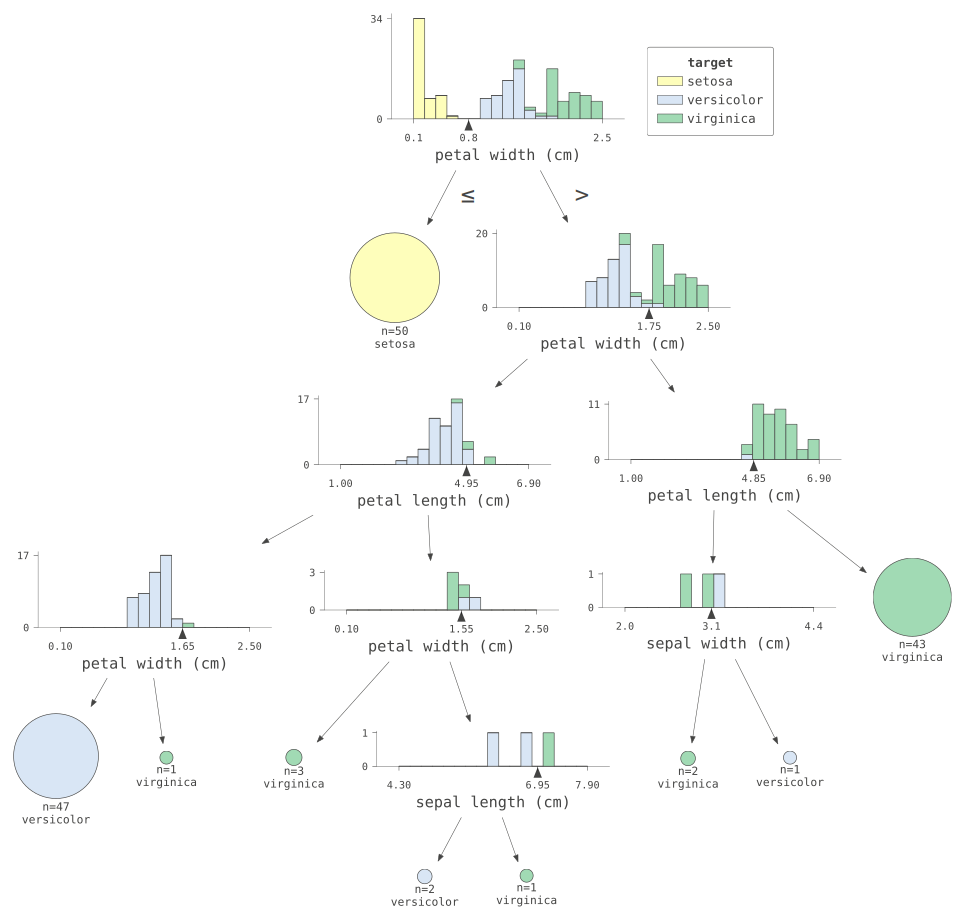

In [2]:
import dtreeviz # https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb


viz_model = dtreeviz.model(tree_clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz_model.view(fontname="monospace", scale=1.7)

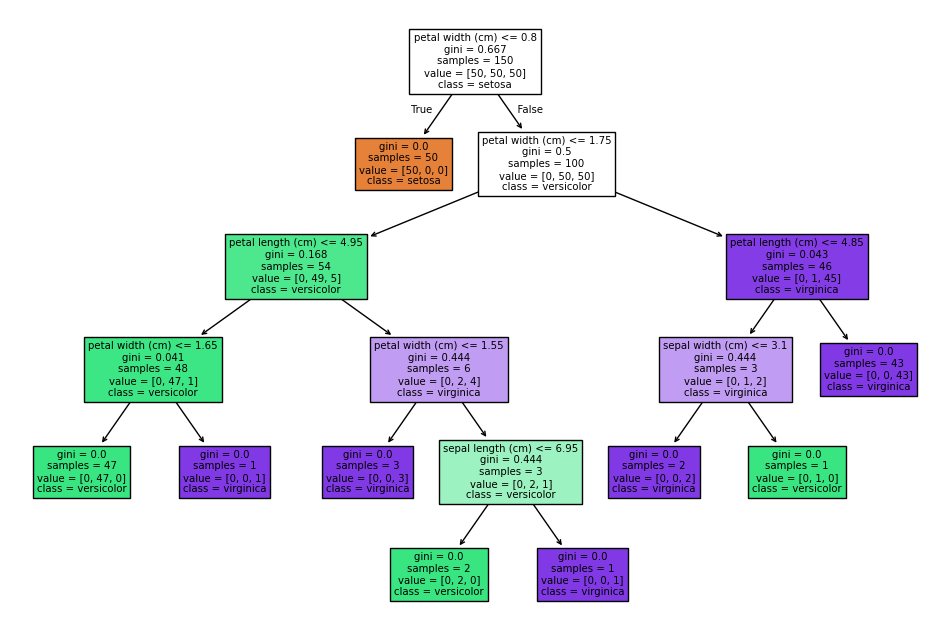

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Increase the figure size
plot_tree(tree_clf,
        feature_names=iris.feature_names,
        class_names=list(iris.target_names),
        filled=True)
plt.show()

## Decision Trees for Regression

Decision trees can be used for both classification and regression tasks. These two problem categories differ in the nature of the target variable. In the case of classification, the target variable is categorical, while in the case of regression, the target variable is numeric or continuous.

While decision trees for classification are built in the same way as decision trees for regression, the way predictions are made is different. In the case of classification, the prediction is made by assigning the most frequent class in the terminal node. **In the case of regression, the prediction is made by calculating the average of the observations in the training set** that belong to the same terminal node.

Regression trees divide continuous output data into discrete intervals.

Let's perform a regression with a decision tree on the same dataset we used in the linear regression notebook.

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("data/salaries.csv")

tree_reg = DecisionTreeRegressor(max_depth=3).fit(df[["YearsExperience"]], df["Salary"])

/home/avidaldo/TRABAJO/wip-clase/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


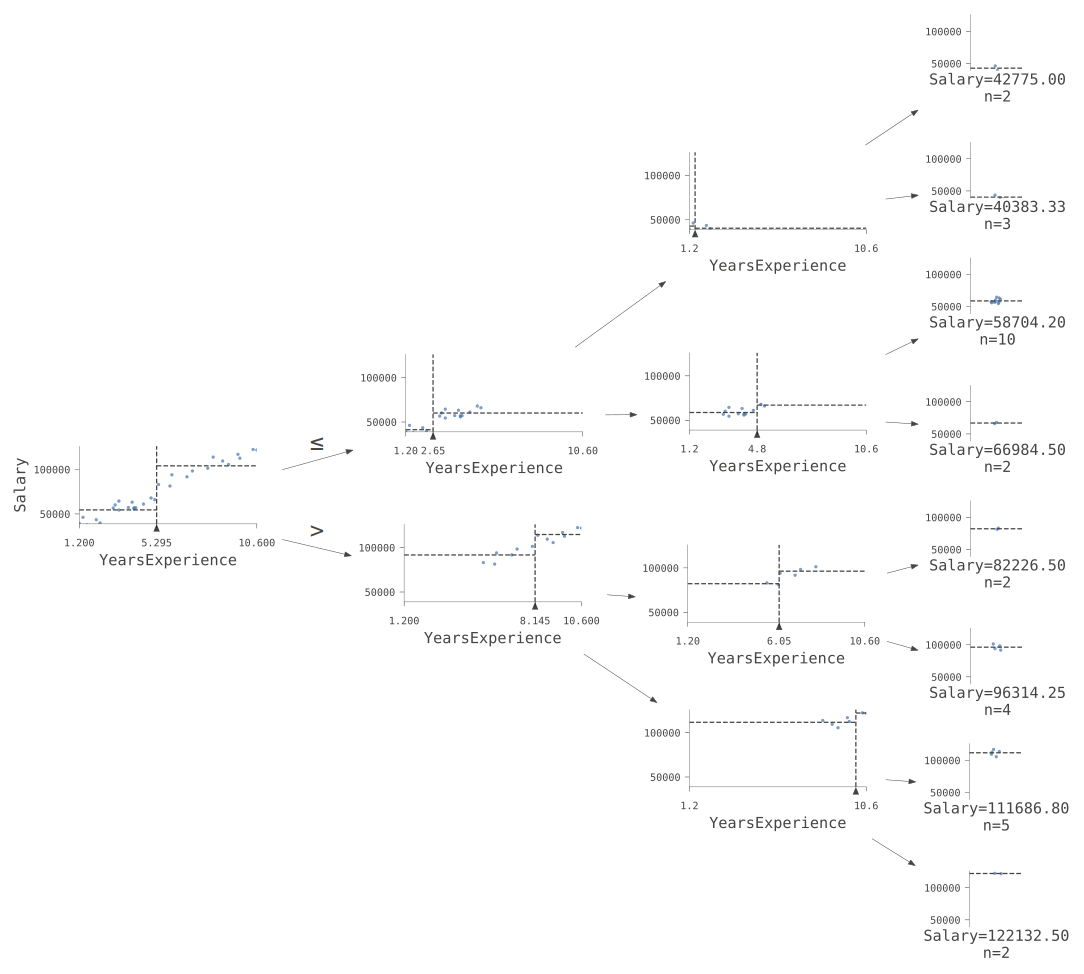

In [5]:
viz_model = dtreeviz.model(tree_reg, df[["YearsExperience"]], df["Salary"], target_name="Salary", feature_names=["YearsExperience"])
viz_model.view(fontname="monospace", scale=1.7, orientation="LR")

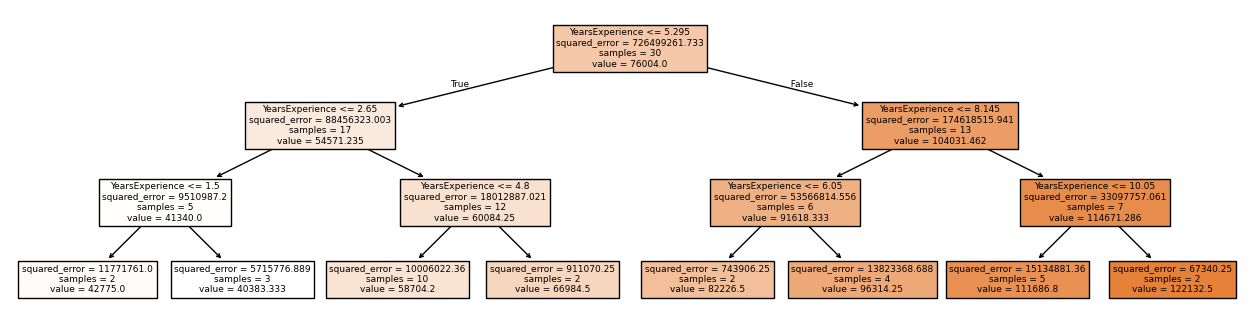

In [6]:
plt.figure(figsize=(16, 4))  # Use matplotlib to define the figure size
_ = plot_tree(tree_reg, filled=True, feature_names=["YearsExperience"])

## Comparison with Linear Regression and Overfitting

If we apply a regression tree to the same dataset we used for linear regression, we can observe that the regression tree fits the data much better. This is because the regression tree is capable of capturing non-linear relationships between the input features and the target variable. The problem with this is that it tends to **overfit** the data.

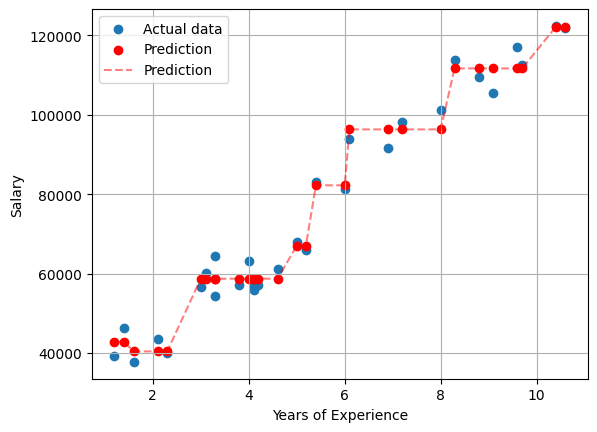

In [7]:
plt.scatter(df['YearsExperience'], df['Salary'], label='Actual data')
df = df.sort_values(by=['YearsExperience'])
y_pred = tree_reg.predict(df[['YearsExperience']])
plt.scatter(df['YearsExperience'], y_pred, color='red', label='Prediction')
plt.plot(df['YearsExperience'], y_pred, color='red', label='Prediction', linestyle='--', alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

If we create many points in the range where we are predicting:

/home/avidaldo/TRABAJO/wip-clase/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


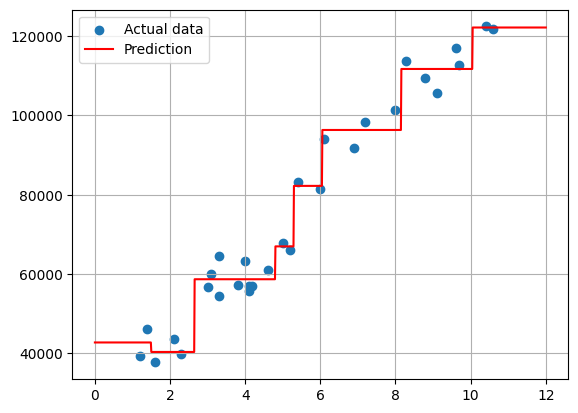

In [8]:
import numpy as np

plt.scatter(df['YearsExperience'], df['Salary'], label='Actual data')
x = np.linspace(0, 12, 1000)
y_pred = tree_reg.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='red', label='Prediction')
plt.legend()
plt.grid(True)
plt.show()

We can easily observe one of the main disadvantages of decision trees: their tendency to overfit the data. Decision trees tend to have high variance and, therefore, tend to overfit the data. This can be mitigated through tree pruning, limiting the depth of the tree, limiting the number of leaf nodes, or limiting the minimum number of samples required to split an internal node. In fact, we have used a decision tree with a maximum depth of only 3. Let's see what happens if we use a decision tree without limiting its depth.

/home/avidaldo/TRABAJO/wip-clase/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


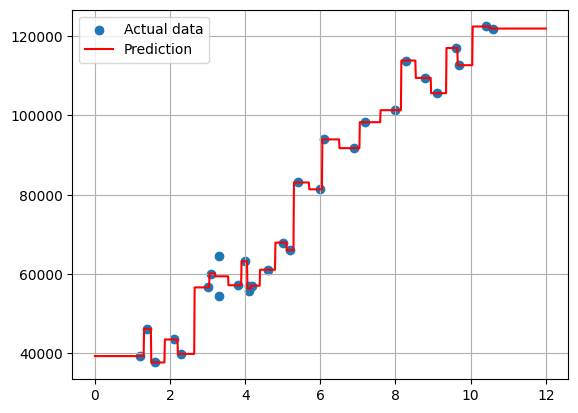

In [9]:
tree_reg = DecisionTreeRegressor().fit(df[["YearsExperience"]], df["Salary"])

plt.scatter(df['YearsExperience'], df['Salary'], label='Actual data')
x = np.linspace(0, 12, 1000)
y_pred = tree_reg.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='red', label='Prediction')
plt.legend()
plt.grid(True)
plt.show()

The decision tree continues making splits until each leaf has a single sample. This is a clear example of overfitting. However, we may notice that there are some samples that don't coincide with their prediction (clearly between 3 and 4, and we can intuit another case shortly after 4). This is because those samples have exactly the same predictor value, so the decision tree is forced to calculate the average. Let's confirm in which cases this occurs:

In [10]:
df['YearsExperience'].value_counts().loc[lambda x: x>1]

# or equivalently:
repeated_x = df['YearsExperience'].value_counts()
repeated_x.loc[repeated_x > 1]

YearsExperience
4.1    2
3.3    2
Name: count, dtype: int64